<a href="https://colab.research.google.com/github/IsidroJ/Colab_Archivos_Clase_PADP/blob/main/Pr%C3%A1ctica_26_Validaci%C3%B3n%2C_Evaluaci%C3%B3n_y_Selecci%C3%B3n_IJGH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 26: Validación, Evaluación y Selección**

### **1. Carga de Bibliotecas, Conjunto de Datos y Análisis Exploratorio de los Datos**

* Declarar las bibliotecas necesarias para este proyecto
* Cargar el conjunto de datos Glioma Grading Clinical and Mutation Features. Se puede descargar de:

 https://archive.ics.uci.edu/dataset/759/glioma+grading+clinical+and+mutation+features+dataset

**Declarar las bibliotecas necesarias para este proyecto**

In [21]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score,
                             confusion_matrix, ConfusionMatrixDisplay, classification_report)


In [22]:
from IPython.display import display, HTML
import numpy as np

display(HTML("<h3 style='color:blue; font-size:18px;'> Cargar el Dataset </h3>"))

df = pd.read_csv('/content/drive/MyDrive/1_ClassFiles/21_Clase 31-10-2025/TCGA_InfoWithGrade.csv')
print(df)


     Grade  Gender  Age_at_diagnosis  Race  IDH1  TP53  ATRX  PTEN  EGFR  CIC  \
0        0       0             51.30     0     1     0     0     0     0    0   
1        0       0             38.72     0     1     0     0     0     0    1   
2        0       0             35.17     0     1     1     1     0     0    0   
3        0       1             32.78     0     1     1     1     0     0    0   
4        0       0             31.51     0     1     1     1     0     0    0   
..     ...     ...               ...   ...   ...   ...   ...   ...   ...  ...   
834      1       1             77.89     0     0     0     0     1     0    0   
835      1       0             85.18     0     0     1     0     1     0    0   
836      1       1             77.49     0     0     1     0     1     0    0   
837      1       0             63.33     0     0     1     0     0     0    0   
838      1       0             76.61     1     0     0     0     0     0    0   

     ...  FUBP1  RB1  NOTCH

### **2. Análisis exploratorio de datos (EDA)**

Realiza un análisis inicial de los datos antes de modelar:

* Describir forma y estructura (shape, describe(), info()).

* Mostrar la distribución de clases (y.value_counts()).

* Visualizar:

  * Histograma de al menos 3 variables numéricas.

  * Boxplots o violin plots por clase si es computacionalmente viable.

  * Mapa de calor de correlaciones entre variables.

**Reflexiona:**

* ¿Existen clases desbalanceadas?

* ¿Qué atributos parecen más informativos?

In [23]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Describir la forma y estructura del dataset (shape, describe(), info()) </h3>"))
print('\n')

print("La forma del Dataset es:\n", df.shape)
print('\n')
print("\n Estadística descriptiva de Dataset:\n \n", df.describe())
print('\n')
print("\n Información básica del Datasel:\n")
print(df.info())




La forma del Dataset es:
 (839, 24)



 Estadística descriptiva de Dataset:
 
             Grade      Gender  Age_at_diagnosis        Race        IDH1  \
count  839.000000  839.000000        839.000000  839.000000  839.000000   
mean     0.419547    0.418355         50.935411    0.107271    0.481526   
std      0.493779    0.493583         15.702339    0.369392    0.499957   
min      0.000000    0.000000         14.420000    0.000000    0.000000   
25%      0.000000    0.000000         38.055000    0.000000    0.000000   
50%      0.000000    0.000000         51.550000    0.000000    0.000000   
75%      1.000000    1.000000         62.800000    0.000000    1.000000   
max      1.000000    1.000000         89.290000    3.000000    1.000000   

             TP53        ATRX        PTEN        EGFR         CIC  ...  \
count  839.000000  839.000000  839.000000  839.000000  839.000000  ...   
mean     0.414779    0.258641    0.168057    0.133492    0.132300  ...   
std      0.492978    



Dimensiones de X: (839, 23)
Dimensiones de y: (839,)


Verificación de columnas en X:
['Gender', 'Age_at_diagnosis', 'Race', 'IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA']


Frecuencias absolutas de la variable 'y':
Grade
0    487
1    352
Name: count, dtype: int64


Frecuencias relativas de la variable 'y' en (%):
Grade
0    58.05%
1    41.95%
Name: proportion, dtype: object




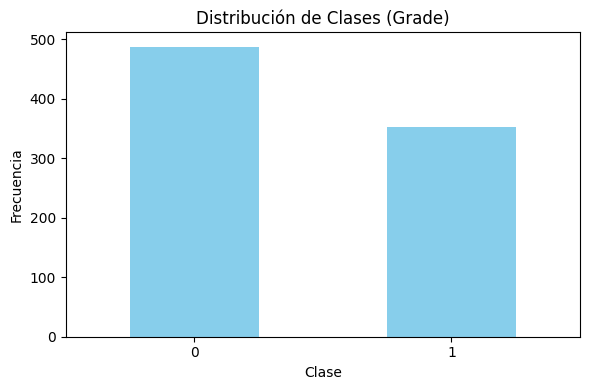

In [24]:
import matplotlib.pyplot as plt

display(HTML("<h3 style='color:blue; font-size:18px;'> Mostrar la distribución de clases (y.value_counts()) </h3>"))
print('\n')

# Separa las variables features (X) and target (y)
features = ['Gender', 'Age_at_diagnosis', 'Race', 'IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA']
target = 'Grade'
X = df[features]
y = df[target]

print("Dimensiones de X:", X.shape)
print("Dimensiones de y:", y.shape)
print('\n')

print("Verificación de columnas en X:")
print(X.columns.tolist())
print('\n')

print("Frecuencias absolutas de la variable 'y':")
print(y.value_counts())
print('\n')

print("Frecuencias relativas de la variable 'y' en (%):")
print((y.value_counts(normalize=True) * 100).round(2).astype(str) + "%")
print('\n')

# Visualización de la distribución de la variable 'y'

plt.figure(figsize=(6,4))
y.value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución de Clases (Grade)')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

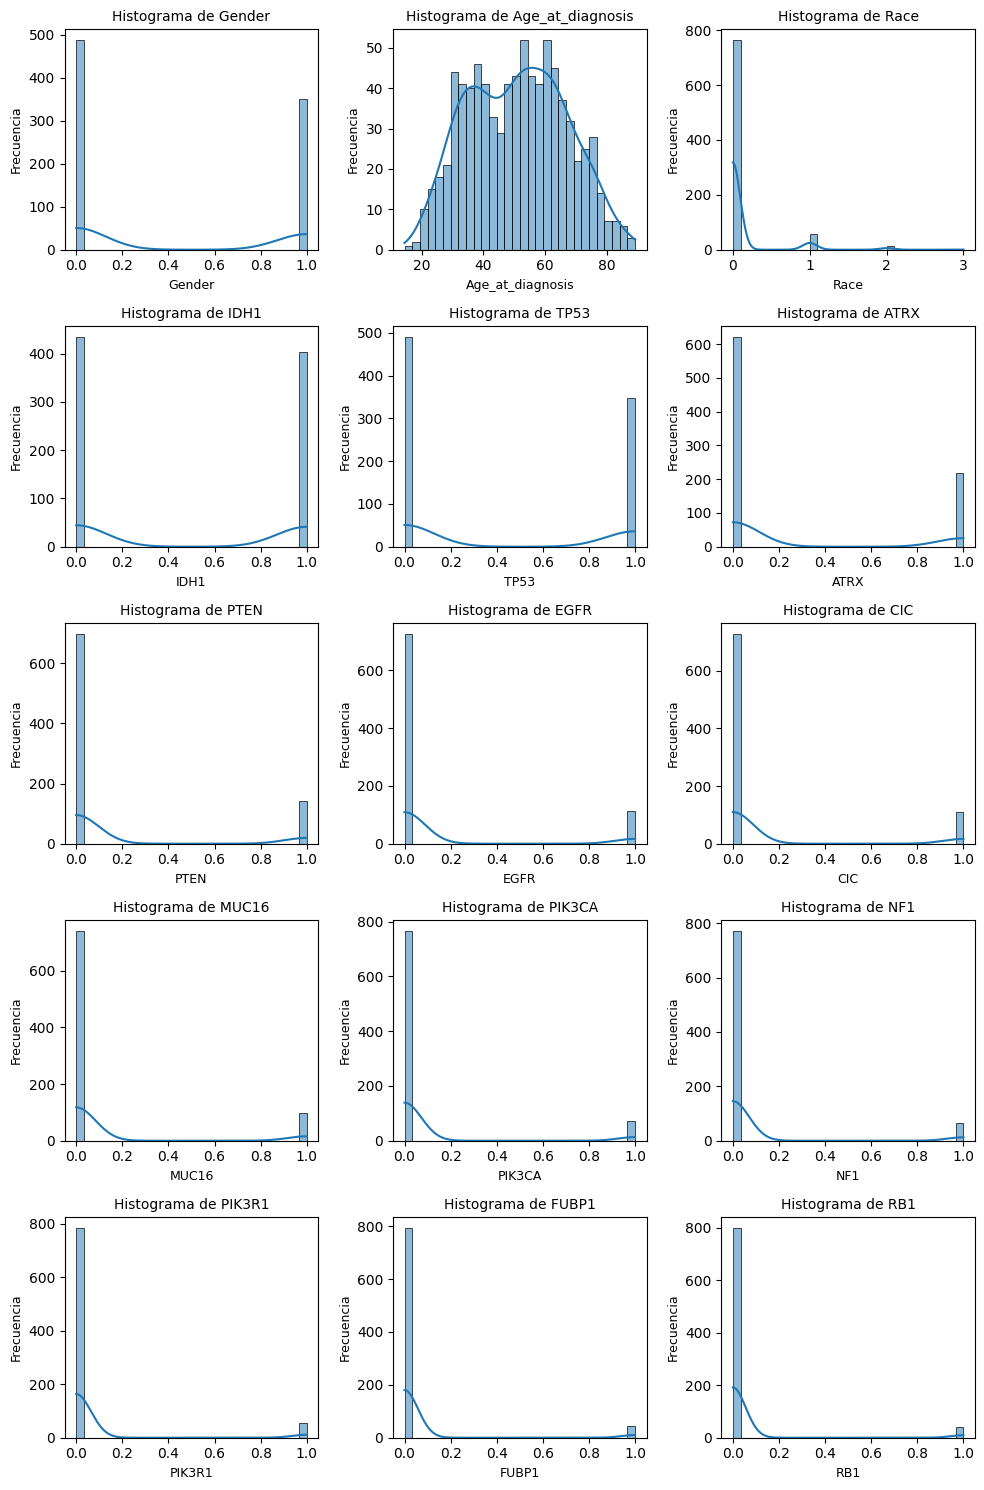

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

display(HTML("<h3 style='color:blue; font-size:18px;'> Visualización (gráficas) del Dataset </h3>"))
print('\n')

cols_to_plot = X.columns[:15]

plt.figure(figsize=(10, 15))
for i, col in enumerate(cols_to_plot, 1):
    ax = plt.subplot(5, 3, i)
    sns.histplot(X[col], bins=30, kde=True, ax=ax)
    plt.title(f"Histograma de {col}", fontsize=10)
    plt.xlabel(col, fontsize=9)
    plt.ylabel("Frecuencia", fontsize=9)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.show()

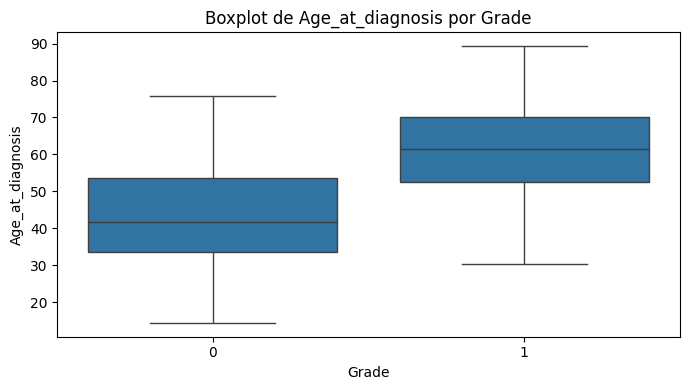

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

feature = 'Age_at_diagnosis'
X = df[feature]
y = df[target]

order = df[target].astype(str).value_counts().index.tolist()
plt.figure(figsize=(7, 4))
sns.boxplot(data=df, x=y, y=X, order=order, showfliers=False)
plt.title(f"Boxplot de {feature} por {target}")
plt.xlabel(target)
plt.ylabel(feature)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

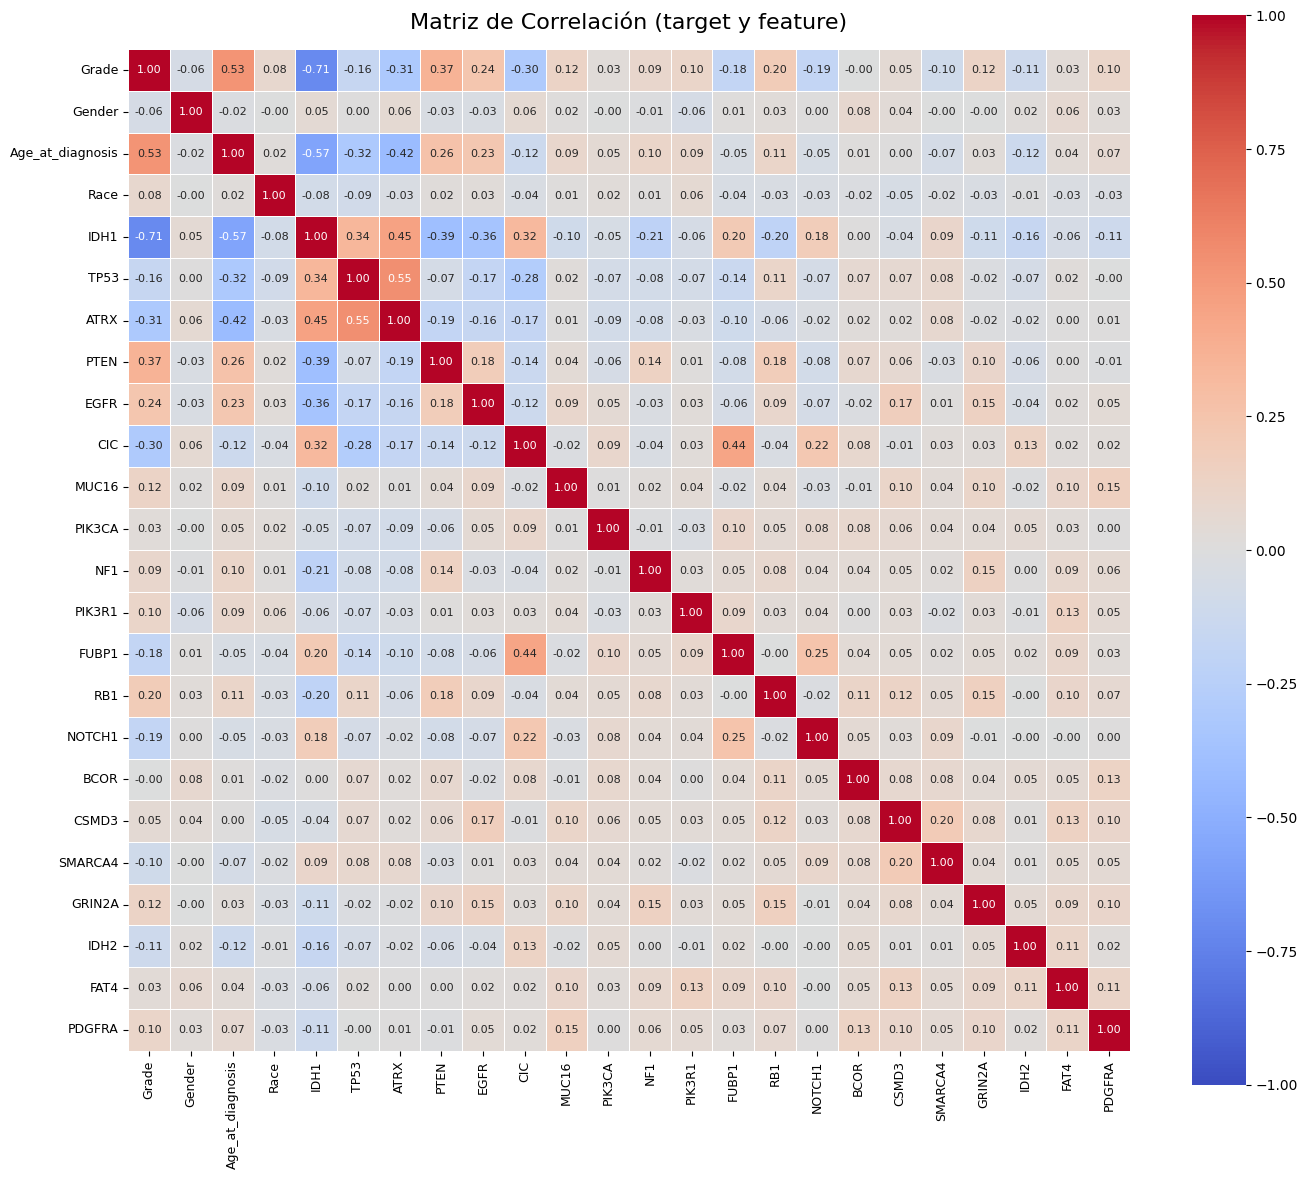

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()

plt.figure(figsize=(14, 12))
ax = sns.heatmap(corr, cmap="coolwarm", vmin=-1, vmax=1, center=0, annot=True,
    fmt=".2f", annot_kws={"size": 8}, linewidths=0.5, linecolor="white", square=True, cbar=True)

ax.set_title("Matriz de Correlación (target y feature)", fontsize=16, pad=15)
ax.tick_params(axis='x', labelrotation=90, labelsize=9)
ax.tick_params(axis='y', labelsize=9)

plt.tight_layout()
plt.show()

**Reflexiona:**

**¿Existen clases desbalanceadas?**

De acuerdo a la literatura en inteligencia artificial, se considera desbalance cuando una clase tiene menos del 40 % o más del 60 % de las observaciones. Para este conjunto de datos:

* La clase 0 tiene 58 %
* La clase 1 tiene 42 %.

Por tanto, el modelo (arboles de decisión) podría favorecer ligeramente la clase mayoritaria (0).


**¿Qué atributos parecen más informativos?**
De acuerdo a la mtariz de correlación considero que las variables que proporcionan mas informació sería: Age_at_dianosis, IDH1, ATRX y PTEN.


### **3. Gráfica de Errores en Entrenamiento y Prueba**


* En este ejercicio vas a entrenar un árbol de decisión con diferentes profundidas. Asimismo, en gráfica mostrarás las exactitudes en entrenamiento y test, usando un stratified k-fold cross-validation con K= 10

* Los valores de las profundides a evaluar son 2, 5, 10, 15, 20, 25, 30 y None

* Deberás usar StratifiedKFold con 10 particiones, y un valor aleaotorio de 3

* Entrenarás y evaluarás un árbol de decisión con estos distintos valores de profundidades

* Usa cross_val_score para entrenar los modelos, usando como métrica de evaluación en scoring ="f1_macro",y el StratifiedKFold, con un valor aleatorio = 7

* Muestra una fráfica para los distintos resultados  cuando se usa F1 Macro

In [28]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

display(HTML("<h3 style='color:blue; font-size:16px;'> División de Datos en Conjuntos de Entrenamiento y Prueba</h3>"))

# Separa las variables features (X) and target (y)
features = ['Gender', 'Age_at_diagnosis', 'Race', 'IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA']
target = 'Grade'
X = df[features]
y = df[target]

# Datos Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Datos de entrenamiento (X_train, y_train):", X_train.shape, y_train.shape)
print("datos de prueba (X_test, y_test):", X_test.shape, y_test.shape)

Datos de entrenamiento (X_train, y_train): (671, 23) (671,)
datos de prueba (X_test, y_test): (168, 23) (168,)


In [29]:
display(HTML("<h3 style='color:blue; font-size:16px;'> Entrenamiento del modelo </h3>"))

#Modelo de clasificación
clf = DecisionTreeClassifier(criterion='gini', max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

              precision    recall  f1-score   support

           0       0.93      0.78      0.85        89
           1       0.79      0.94      0.86        79

    accuracy                           0.85       168
   macro avg       0.86      0.86      0.85       168
weighted avg       0.86      0.85      0.85       168

[[69 20]
 [ 5 74]]


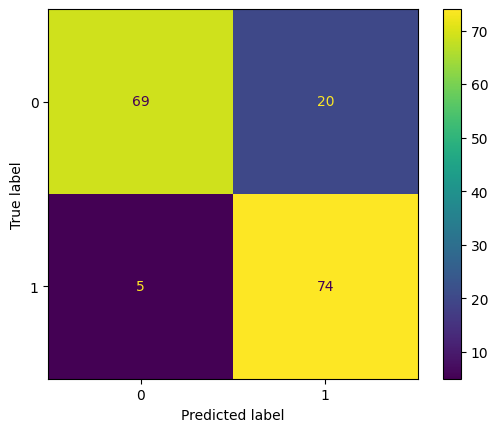

In [30]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()



Profundidad: 2
Resultados:
accuracy: 0.8689
precision_macro: 0.8686
recall_macro: 0.8772
f1_macro: 0.8677


Profundidad: 5
Resultados:
accuracy: 0.8652
precision_macro: 0.8639
recall_macro: 0.8729
f1_macro: 0.8640


Profundidad: 10
Resultados:
accuracy: 0.8486
precision_macro: 0.8464
recall_macro: 0.8507
f1_macro: 0.8462


Profundidad: 15
Resultados:
accuracy: 0.8176
precision_macro: 0.8150
recall_macro: 0.8153
f1_macro: 0.8131


Profundidad: 20
Resultados:
accuracy: 0.8188
precision_macro: 0.8160
recall_macro: 0.8139
f1_macro: 0.8136


Profundidad: 25
Resultados:
accuracy: 0.8033
precision_macro: 0.8011
recall_macro: 0.7970
f1_macro: 0.7972


Profundidad: 30
Resultados:
accuracy: 0.8045
precision_macro: 0.8023
recall_macro: 0.7984
f1_macro: 0.7985


Profundidad: None
Resultados:
accuracy: 0.8045
precision_macro: 0.8023
recall_macro: 0.7984
f1_macro: 0.7985




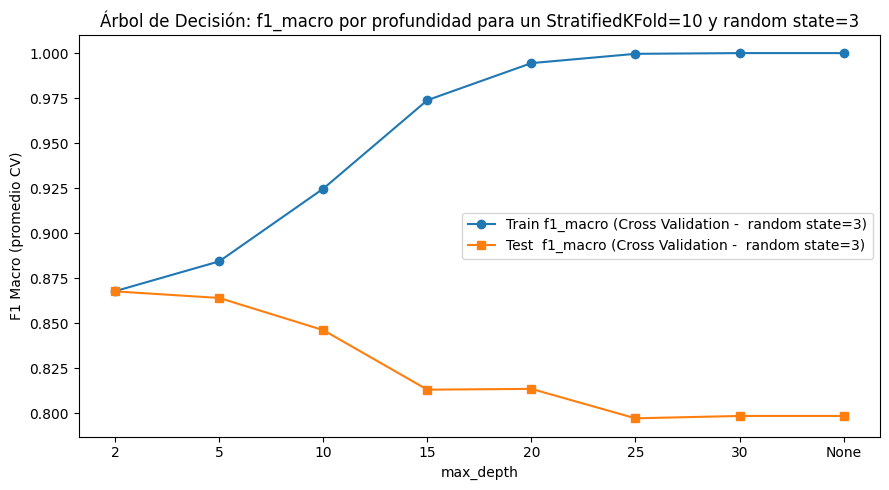

In [31]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
import numpy as np

display(HTML("<h3 style='color:blue; font-size:16px;'> f1_macro (Train vs Test) por profundidad para StratifiedKFold=10 y random state=3 </h3>"))

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=3)

depths = [2, 5, 10, 15, 20, 25, 30, None]
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

train_f1_means = []
test_f1_means  = []

for d in depths:
    clf_cv = DecisionTreeClassifier(criterion='entropy',max_depth=d, random_state=42)

    results = cross_validate(clf_cv, X, y, cv=skf, scoring=scoring, return_train_score=True)
    print('\n')
    print(f"Profundidad: {d}")
    print("Resultados:")

    for metric in scoring:
      print(f"{metric}: {results['test_' + metric].mean():.4f}")

    # Move these lines inside the loop
    train_f1_means.append(results['train_f1_macro'].mean())
    test_f1_means.append(results['test_f1_macro'].mean())

print('\n')

x_labels = [str(d) for d in depths]
plt.figure(figsize=(9, 5))
plt.plot(x_labels, train_f1_means, marker='o', label='Train f1_macro (Cross Validation -  random state=3)')
plt.plot(x_labels, test_f1_means,  marker='s', label='Test  f1_macro (Cross Validation -  random state=3)')
plt.xlabel('max_depth')
plt.ylabel('F1 Macro (promedio CV)')
plt.title('Árbol de Decisión: f1_macro por profundidad para un StratifiedKFold=10 y random state=3')
plt.legend()
plt.tight_layout()
plt.show()

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Check if hist_df exists before plotting
if 'hist_df' in locals() or 'hist_df' in globals():
    # Replace None with string 'None' for plotting purposes
    hist_df_plot = hist_df.copy()
    hist_df_plot['depth'] = hist_df_plot['depth'].fillna('None').astype(str)

    plt.figure(figsize=(10, 6))
    plt.plot(hist_df_plot["depth"], hist_df_plot["accuracy"], marker="o", label="Accuracy")
    plt.plot(hist_df_plot["depth"], hist_df_plot["precision"], marker="o", label="Precision")
    plt.plot(hist_df_plot["depth"], hist_df_plot["recall"], marker="o", label="Recall")
    plt.plot(hist_df_plot["depth"], hist_df_plot["f1"], marker="o", label="F1-score")

    # Check if best_depth exists before plotting the vertical line
    if 'best_depth' in locals() or 'best_depth' in globals():
        plt.axvline(best_depth, linestyle="--", alpha=0.7, color='gray', label=f'Best Depth ({best_depth})')


    plt.title("Desempeño en Test vs max_depth para random state=3")
    plt.xlabel("max_depth")
    plt.ylabel("Score")
    plt.xticks(hist_df_plot["depth"])
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("Error: DataFrame 'hist_df' not found. Please run the previous cell to generate it.")

Error: DataFrame 'hist_df' not found. Please run the previous cell to generate it.




Profundidad: 2
Resultados:
accuracy: 0.8689
precision_macro: 0.8694
recall_macro: 0.8775
f1_macro: 0.8678


Profundidad: 5
Resultados:
accuracy: 0.8606
precision_macro: 0.8613
recall_macro: 0.8691
f1_macro: 0.8594


Profundidad: 10
Resultados:
accuracy: 0.8451
precision_macro: 0.8446
recall_macro: 0.8503
f1_macro: 0.8432


Profundidad: 15
Resultados:
accuracy: 0.8129
precision_macro: 0.8095
recall_macro: 0.8094
f1_macro: 0.8080


Profundidad: 20
Resultados:
accuracy: 0.8022
precision_macro: 0.7991
recall_macro: 0.7983
f1_macro: 0.7970


Profundidad: 25
Resultados:
accuracy: 0.8140
precision_macro: 0.8112
recall_macro: 0.8089
f1_macro: 0.8085


Profundidad: 30
Resultados:
accuracy: 0.8116
precision_macro: 0.8093
recall_macro: 0.8048
f1_macro: 0.8052


Profundidad: None
Resultados:
accuracy: 0.8116
precision_macro: 0.8093
recall_macro: 0.8048
f1_macro: 0.8052




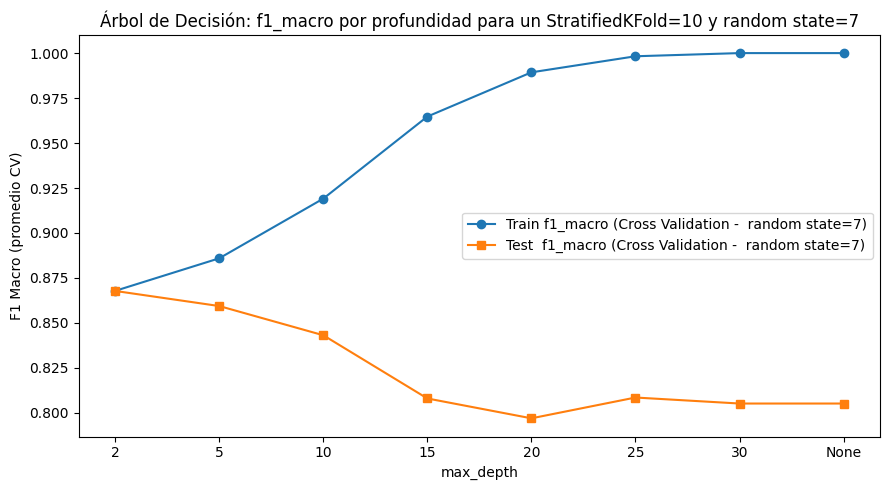

In [33]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
import numpy as np

display(HTML("<h3 style='color:blue; font-size:16px;'> f1_macro (Train vs Test) por profundidad para StratifiedKFold=10 y random state=7 </h3>"))

skf7 = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

depths = [2, 5, 10, 15, 20, 25, 30, None]
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

train_f1_rs7 = []
test_f1_rs7  = []

for d in depths:
    clf_cv7 = DecisionTreeClassifier(criterion='entropy',max_depth=d, random_state=42)

    results = cross_validate(clf_cv7, X, y, cv=skf7, scoring=scoring, return_train_score=True)
    print('\n')
    print(f"Profundidad: {d}")
    print("Resultados:")

    for metric in scoring:
      print(f"{metric}: {results['test_' + metric].mean():.4f}")

    # Move these lines inside the loop
    train_f1_rs7.append(results['train_f1_macro'].mean())
    test_f1_rs7.append(results['test_f1_macro'].mean())

print('\n')

x_labels = [str(d) for d in depths]
plt.figure(figsize=(9, 5))
plt.plot(x_labels, train_f1_rs7, marker='o', label='Train f1_macro (Cross Validation -  random state=7)')
plt.plot(x_labels, test_f1_rs7,  marker='s', label='Test  f1_macro (Cross Validation -  random state=7)')
plt.xlabel('max_depth')
plt.ylabel('F1 Macro (promedio CV)')
plt.title('Árbol de Decisión: f1_macro por profundidad para un StratifiedKFold=10 y random state=7')
plt.legend()
plt.tight_layout()
plt.show()

Valores de f1_macro por profundidad para cross_val_score y random state=7:

  depth=2: 0.8678
  depth=5: 0.8594
  depth=10: 0.8432
  depth=15: 0.8080
  depth=20: 0.7970
  depth=25: 0.8085
  depth=30: 0.8052
  depth=None: 0.8052




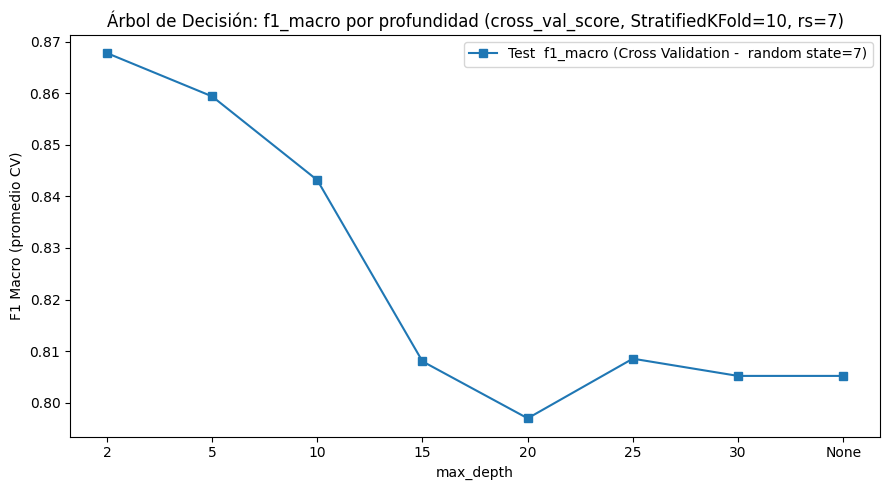

In [34]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

display(HTML("<h3 style='color:blue; font-size:16px;'> f1_macro promedio por profundidad (cross_val_score, StratifiedKFold rs=7) </h3>"))

skf7 = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

depths = [2, 5, 10, 15, 20, 25, 30, None]
test_f1_rs7 = []

print("Valores de f1_macro por profundidad para cross_val_score y random state=7:\n")
for d in depths:
    clf_cv7 = DecisionTreeClassifier(criterion='entropy',max_depth=d, random_state=42)

    # Use cross_val_score with scoring='f1_macro'
    scores = cross_val_score(clf_cv7, X, y, cv=skf7, scoring='f1_macro') # Changed to cross_val_score and single scoring


    mean_f1 = scores.mean()
    print(f"  depth={d}: {mean_f1:.4f}")

    # Append the mean test score to the list
    test_f1_rs7.append(mean_f1)

print('\n')

x_labels = [str(d) for d in depths]
plt.figure(figsize=(9, 5))
plt.plot(x_labels, test_f1_rs7,  marker='s', label='Test  f1_macro (Cross Validation -  random state=7)')
plt.xlabel('max_depth')
plt.ylabel('F1 Macro (promedio CV)')
plt.title('Árbol de Decisión: f1_macro por profundidad (cross_val_score, StratifiedKFold=10, rs=7)')
plt.legend()
plt.tight_layout()
plt.show()

### **4. Optimización de hiperparámetros con RandomizedSearchCV**


* Define el espacio de búsqueda aleatorio para los siguientes hiperpárametros:Usa el árbol de decisión:

  * Criterion = gini ,entropy
  * max_depth: de 5 a 50 con incrementos de 1
  * min_samples_split: de 2 a 20 con incrementos de 1


* StratifiedKfold = 10 (no deberás realizar ninguna partición previa: realiza el ejercicio considerando que es un conjunto de tamaño medio)

* n_iter = 5 (combinaciones aleatorias a buscar)

* n_jobs = -1 para acelerar cómputo

* Métrica de evaluación: f1 Macro

* Imprime los mejores hiperparámetros encontrados

* Imprime el best_score

In [35]:
from IPython.display import display, HTML
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

display(HTML("<h3 style='color:blue; font-size:16px;'> Optimización de hiperparámetros con RandomizedSearchCV con métrica f1_macro </h3>"))

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=3)

param_dist = {
    "criterion": ["gini", "entropy"],
    "max_depth": list(range(5, 51, 1)),         # 5 a 50 con incremento 1
    "min_samples_split": list(range(2, 21, 1))  # 2 a 20 con incremento 1
}

clf_cv_rand = DecisionTreeClassifier(random_state=3)
rs_f1 = RandomizedSearchCV(clf_cv_rand, param_dist, cv=skf, scoring="f1_macro", n_iter=5, n_jobs=-1, random_state=3, verbose=0)

rs_f1.fit(X, y)

print('\n')

print("Mejores hiperparámetros encontrados para RandomizedSearchCV con métrica f1_macro:")
print(rs_f1.best_params_)

print('\n')

print(f"Mejor f1_macro promedio (best_score_): {rs_f1.best_score_:.4f}")

cvres = pd.DataFrame(rs_f1.cv_results_)
cols = ["mean_test_score", "std_test_score", "param_criterion", "param_max_depth", "param_min_samples_split"]
print(cvres[cols].sort_values(by="mean_test_score", ascending=False).reset_index(drop=True))




Mejores hiperparámetros encontrados para RandomizedSearchCV con métrica f1_macro:
{'min_samples_split': 20, 'max_depth': 9, 'criterion': 'entropy'}


Mejor f1_macro promedio (best_score_): 0.8595
   mean_test_score  std_test_score param_criterion  param_max_depth  \
0         0.859512        0.029007         entropy                9   
1         0.850053        0.037934         entropy                9   
2         0.842609        0.031447         entropy               47   
3         0.838994        0.044152         entropy               46   
4         0.810433        0.041077         entropy               26   

   param_min_samples_split  
0                       20  
1                        4  
2                       18  
3                       16  
4                        2  


### **5. Optimización de hiperparámetros con GridSearchCV**


* DDefine el espacio de búsqueda  para los siguientes hiperpárametros: Usa el árbol de decisión:

  * Criterion = gini ,entropy
  * max_depth: de 5 a 50 con incrementos de 1
  * min_samples_split: de 2 a 20 con incrementos de 1


* StratifiedKfold = 10 (no deberás realizar ninguna partición previa: realiza el ejercicio considerando que es un conjunto de tamaño medio)

* Métrica de evaluación: f1 Macro

* n_jobs = -1 para acelerar cómputo

* Imprime los mejores hiperparámetros encontrados

* Imprime el best_score

In [36]:
from IPython.display import display, HTML
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

display(HTML("<h3 style='color:blue; font-size:16px;'> Optimización de hiperparámetros para GridSearchCV con métrica f1_macro </h3>"))

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=3)

param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": list(range(5, 51, 1)),
    "min_samples_split": list(range(2, 21, 1))
}


clf_cv_grid = DecisionTreeClassifier(random_state=3)
gs_f1 = GridSearchCV(clf_cv_grid, param_grid, cv=skf, scoring="f1_macro", n_jobs=-1, verbose=0)

gs_f1.fit(X, y)

print('\n')

print("Mejores hiperparámetros encontrados para GridSearchCV con métrica f1_macro):")
print(gs_f1.best_params_)

print('\n')

print(f"Mejor f1_macro promedio (best_score_): {gs_f1.best_score_:.4f}")

cvres = pd.DataFrame(gs_f1.cv_results_)
cols = ["mean_test_score", "std_test_score", "param_criterion", "param_max_depth", "param_min_samples_split"]
print(cvres[cols].sort_values(by="mean_test_score", ascending=False).reset_index(drop=True))




Mejores hiperparámetros encontrados para GridSearchCV con métrica f1_macro):
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 13}


Mejor f1_macro promedio (best_score_): 0.8651
      mean_test_score  std_test_score param_criterion  param_max_depth  \
0            0.865116        0.034393         entropy                6   
1            0.865116        0.034393         entropy                6   
2            0.865116        0.034393         entropy                6   
3            0.865116        0.034393         entropy                6   
4            0.865116        0.034393         entropy                6   
...               ...             ...             ...              ...   
1743         0.787265        0.046098            gini               22   
1744         0.786584        0.050432            gini               26   
1745         0.786568        0.048459            gini               24   
1746         0.786568        0.048459            gini              

### **6. Optimización de hiperparámetros con RandomizedSearchCV: Accuracy**


* Define el espacio de búsqueda aleatorio para los siguientes hiperpárametros:Usa el árbol de decisión:

  * Criterion = gini ,entropy
  * max_depth: de 5 a 50 con incrementos de 1
  * min_samples_split: de 2 a 20 con incrementos de 1


* StratifiedKfold = 10 (no deberás realizar ninguna partición previa: realiza el ejercicio considerando que es un conjunto de tamaño medio)

* n_iter = 5 (combinaciones aleatorias a buscar)

* n_jobs = -1 para acelerar cómputo

* Métrica de evaluación: accuracy

* mprime los mejores hiperparámetros encontrados

* Imprime el best_score

In [37]:
from IPython.display import display, HTML
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

display(HTML("<h3 style='color:blue; font-size:16px;'> Optimización de hiperparámetros para RandomizedSearchCV con métrica Accuracy </h3>"))

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=3)

param_dist = {
    "criterion": ["gini", "entropy"],
    "max_depth": list(range(5, 51, 1)),
    "min_samples_split": list(range(2, 21, 1))
}

clf_cv_rand_acc = DecisionTreeClassifier(random_state=3)
rs_acc = RandomizedSearchCV(clf_cv_rand_acc, param_dist, cv=skf, n_iter=5, scoring="accuracy", n_jobs=-1, random_state=3, verbose=0)

rs_acc.fit(X, y)

print('\n')

print("Mejores hiperparámetros encontrados para RandomizedSearchCV con métrica Accuracy:")
print(rs_acc.best_params_)

print('\n')

print(f"Mejor Accuracy promedio (best_score_): {rs_acc.best_score_:.4f}")

# (Opcional) Tabla ordenada de resultados de CV
cvres_acc = pd.DataFrame(rs_acc.cv_results_)
cols = ["mean_test_score", "std_test_score", "param_criterion", "param_max_depth", "param_min_samples_split"]
print(cvres_acc[cols].sort_values(by="mean_test_score", ascending=False).reset_index(drop=True))




Mejores hiperparámetros encontrados para RandomizedSearchCV con métrica Accuracy:
{'min_samples_split': 20, 'max_depth': 9, 'criterion': 'entropy'}


Mejor Accuracy promedio (best_score_): 0.8617
   mean_test_score  std_test_score param_criterion  param_max_depth  \
0         0.861690        0.029077         entropy                9   
1         0.852137        0.038081         entropy                9   
2         0.847433        0.030972         entropy               47   
3         0.843847        0.043453         entropy               46   
4         0.815204        0.040572         entropy               26   

   param_min_samples_split  
0                       20  
1                        4  
2                       18  
3                       16  
4                        2  


### **7. Optimización de hiperparámetros con GridSearchCV: accuracy**


* Define el espacio de búsqueda  para los siguientes hiperpárametros:Usa el árbol de decisión:

  * Criterion = gini ,entropy
  * max_depth: de 5 a 50 con incrementos de 1
  * min_samples_split: de 2 a 20 con incrementos de 1


* StratifiedKfold = 10 (no deberás realizar ninguna partición previa: realiza el ejercicio considerando que es un conjunto de tamaño medio)

* Métrica de evaluación: f1 Macro

* n_jobs = -1 para acelerar cómputo

* mprime los mejores hiperparámetros encontrados

* Imprime el best_score

In [38]:
from IPython.display import display, HTML
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

display(HTML("<h3 style='color:blue; font-size:16px;'> Optimización de hiperparámetros para GridSearchCV con métrica Accuracy </h3>"))

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=3)


param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": list(range(5, 51, 1)),
    "min_samples_split": list(range(2, 21, 1))
}


clf_cv_grid_acc = DecisionTreeClassifier(random_state=3)
gs_acc = GridSearchCV(clf_cv_grid_acc, param_grid, cv=skf, scoring="accuracy",  n_jobs=-1, verbose=0)

gs_acc.fit(X, y)
print('\n')

print("Mejores hiperparámetros encontrados para GridSearchCV con métrica Accuracy:")
print(gs_acc.best_params_)
print('\n')

print(f"Mejor Accuracy promedio (best_score_): {gs_acc.best_score_:.4f}")


cvres_acc = pd.DataFrame(gs_acc.cv_results_)
cols = ["mean_test_score", "std_test_score", "param_criterion", "param_max_depth", "param_min_samples_split"]
print(cvres_acc[cols].sort_values(by="mean_test_score", ascending=False).reset_index(drop=True))




Mejores hiperparámetros encontrados para GridSearchCV con métrica Accuracy:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 13}


Mejor Accuracy promedio (best_score_): 0.8665
      mean_test_score  std_test_score param_criterion  param_max_depth  \
0            0.866452        0.036305         entropy                5   
1            0.866452        0.034298         entropy                6   
2            0.866452        0.036305         entropy                5   
3            0.866452        0.036305         entropy                5   
4            0.866452        0.036305         entropy                5   
...               ...             ...             ...              ...   
1743         0.793804        0.047323            gini               23   
1744         0.793804        0.047323            gini               24   
1745         0.793804        0.049087            gini               26   
1746         0.793804        0.049087            gini               

In [39]:
from IPython.display import display, HTML
import numpy as np, pandas as pd, inspect

display(HTML("<h3 style='color:blue'>Resumen para Punto 8</h3>"))

# 1) Distribución de clases
try:
    y_series = y if hasattr(y, "value_counts") else df['Grade']
    cls = y_series.value_counts()
    cls_pct = (y_series.value_counts(normalize=True)*100).round(2)
    print("Distribución de clases:")
    print(pd.DataFrame({"freq": cls, "pct": cls_pct}))
except Exception as e:
    print("No pude leer y / Grade:", e)

# 2) Helper para extraer best_score_ / best_params_ de objetos si existen
def grab(name):
    if name in globals():
        obj = globals()[name]
        row = {"obj": name}
        # best_score y best_params
        for attr in ["best_score_", "best_params_"]:
            row[attr] = getattr(obj, attr, None)
        # cuántos candidatos evaluó (si tiene cv_results_)
        try:
            row["n_candidatos"] = len(obj.cv_results_["params"])
            row["tiempo_total_aprox_s"] = float(np.sum(obj.cv_results_["mean_fit_time"]))
        except Exception:
            row["n_candidatos"] = None
            row["tiempo_total_aprox_s"] = None
        return row
    return None

nombres = ["rs_f1", "gs_f1", "rs_acc", "gs_acc"]
res = [grab(n) for n in nombres]
res = [r for r in res if r is not None]

if res:
    df_res = pd.DataFrame(res)
    # Etiqueta bonita
    mapa = {"rs_f1":"RandomizedSearchCV — F1 Macro",
            "gs_f1":"GridSearchCV — F1 Macro",
            "rs_acc":"RandomizedSearchCV — Accuracy",
            "gs_acc":"GridSearchCV — Accuracy"}
    df_res["ejecución"] = df_res["obj"].map(mapa).fillna(df_res["obj"])
    df_res = df_res[["ejecución", "best_score_", "best_params_", "n_candidatos", "tiempo_total_aprox_s"]]
    display(df_res)
else:
    print("No encontré objetos rs_f1, gs_f1, rs_acc, gs_acc en memoria. Ejecuta primero los puntos 4–7.")


Distribución de clases:
       freq    pct
Grade             
0       487  58.05
1       352  41.95


,ejecución,best_score_,best_params_,n_candidatos,tiempo_total_aprox_s
0,RandomizedSearchCV — F1 Macro,0.859512,"{'min_samples_split': 20, 'max_depth': 9, 'cri...",5,0.042071
1,GridSearchCV — F1 Macro,0.865116,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",1748,15.785150
2,RandomizedSearchCV — Accuracy,0.861690,"{'min_samples_split': 20, 'max_depth': 9, 'cri...",5,0.038399
3,GridSearchCV — Accuracy,0.866452,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",1748,16.797712


# **8.Actividad de reflexión y análisis**

* **¿Cuál método encontró mejores hiperparámetros?**

En la optimización de los modelos, el método GridSearchCV fue la técnica que logró identificar los mejores hiperparámetros tanto para la métrica F1 Macro (0.8651), como para Accuracy (0.8665). De acuerdo a la literartura este resultado se explica porque GridSearchCV realiza una búsqueda exhaustiva en todo el espacio de combinaciones posibles de los parámetros definidos, lo que le permite explorar de manera sistemática cada configuración del modelo. Para este métdo se evaluaron 1748 combinaciones derivadas de los distintos valores de los hiperparámetros establecidos tanto gini y entropy.


* **¿Cuál fue más costoso computacionalmente?**

En términos de eficiencia computacional, se puede concluir que el método de GridSearchCV fue el mas costoso, ya que, evaluó un total de 1748 candidatos, en contraste con los 5 modelos probados por RandomizedSearchCV. Este incremento en el número de combinaciones se refleja directamente en el tiempo de ejecución.


* **¿Los resultados en f1_macro set fueron distintos en ambos métodos de optimización? ¿Por qué?**

Los resultados obtenidos muestran que la métrica F1 Macro fue distinto en ambos métps, pero con valores muy cercanos entre si. En el caso del método RandomizedSearchCV, el valor alcanzado fue de 0.8595, mientras que GridSearchCV logró un puntaje ligeramente superior de 0.8651. Esta diferencia se explica porque RandomizedSearchCV evalúa únicamente un número limitado de combinaciones aleatorias (5), lo que implica que podría no explorar las regiones más óptimas del espacio de hiperparámetros.

* **¿Los resultados en accuracy set fueron distintos en ambos métodos de optimización? ¿Por qué?**

Los resultados que se obtuvieron para la métrica de Accuracy también mostraron una ligera diferencia entre ambos métodos. RandomizedSearchCV alcanzó un valor de 0.8617, mientras que GridSearchCV obtuvo un puntaje superior de 0.8665. Esta diferencia responde al mismo principio observado en la evaluación anterior.


* **¿Los valores de hiperpárametros fueron iguales en Accuracy y F1 Macro ?**

Los valores óptimos de los hiperparámetros no fueron iguales para las métricas de Accuracy y F1 Macro. Aunque ambos modelos coincidieron en utilizar el criterio de partición “entropy”, se observaron ligeras variaciones en los parámetros que determinan la estructura del árbol. Para el caso de la métrica F1 Macro, los valores óptimos correspondieron aproximadamente a una max_depth de 6 y un mínimo de min_samples_split de 13, mientras que para la métrica Accuracy los valores ideales fueron una profundidad máxima cercana a 5 y un min_samples_split de alrededor de 13.